In [55]:
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

In [56]:
df = pd.read_csv("/content/drive/MyDrive/Tyumen_University/data/students.csv")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          186 non-null    int64  
 1   Growth                       186 non-null    int64  
 2   Shoe size                    186 non-null    int64  
 3   Course number                186 non-null    int64  
 4   Year of birth                186 non-null    int64  
 5   Friend number                186 non-null    int64  
 6   Russian rating               186 non-null    int64  
 7   Maths rating                 186 non-null    int64  
 8   Physics rating               186 non-null    int64  
 9   Computer science rating      186 non-null    int64  
 10  Chemistry rating             186 non-null    int64  
 11  Literature rating            186 non-null    int64  
 12  History rating               186 non-null    int64  
 13  Geography rating    

In [58]:
df_cut = df[["Growth","Weight","Sex"]]
df_cut = df_cut.dropna()

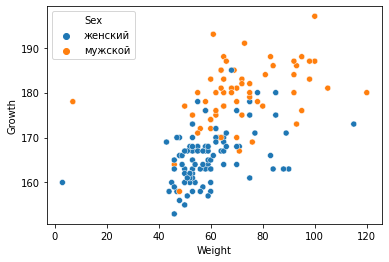

In [59]:
sns.scatterplot(data=df_cut, x="Weight", y="Growth", hue = "Sex")

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit(df_cut[["Growth","Weight"]])
df_norm = scaler.fit_transform(df_cut[["Growth","Weight"]])

In [61]:
# df_norm

In [62]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(df_norm,df_cut["Sex"])

KNeighborsClassifier(n_neighbors=3)

In [63]:
df_test = pd.read_csv("/content/drive/MyDrive/Tyumen_University/data/students_test.csv")
df_test = df_test.dropna()

In [64]:
df_cut_test = df_test[["Growth","Weight","Sex"]]

In [65]:
norm_test = scaler.transform(df_cut_test[["Growth","Weight"]])

In [66]:
df_cut_test["Predict"] = model.predict(norm_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
pd.crosstab(df_cut_test["Predict"],df_cut_test["Sex"])

Sex,женский,мужской
Predict,,
женский,31,3
мужской,5,20
